<a href="https://colab.research.google.com/github/salllwaaa/Boston-House-Price-Prediction/blob/main/Boston_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing important libraries**

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
warnings.filterwarnings('ignore')

# **Reading Data**

In [57]:
Boston=pd.read_csv("/content/Boston Dataset.csv")

In [58]:
Boston.drop(columns=['Unnamed: 0'],axis=0,inplace=True)

In [59]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [60]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# **Data Preproccesing & Visulization**

**check for nulls**

In [61]:
is_null = Boston.isnull().any()
is_null

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

**Detect Outliesrs**

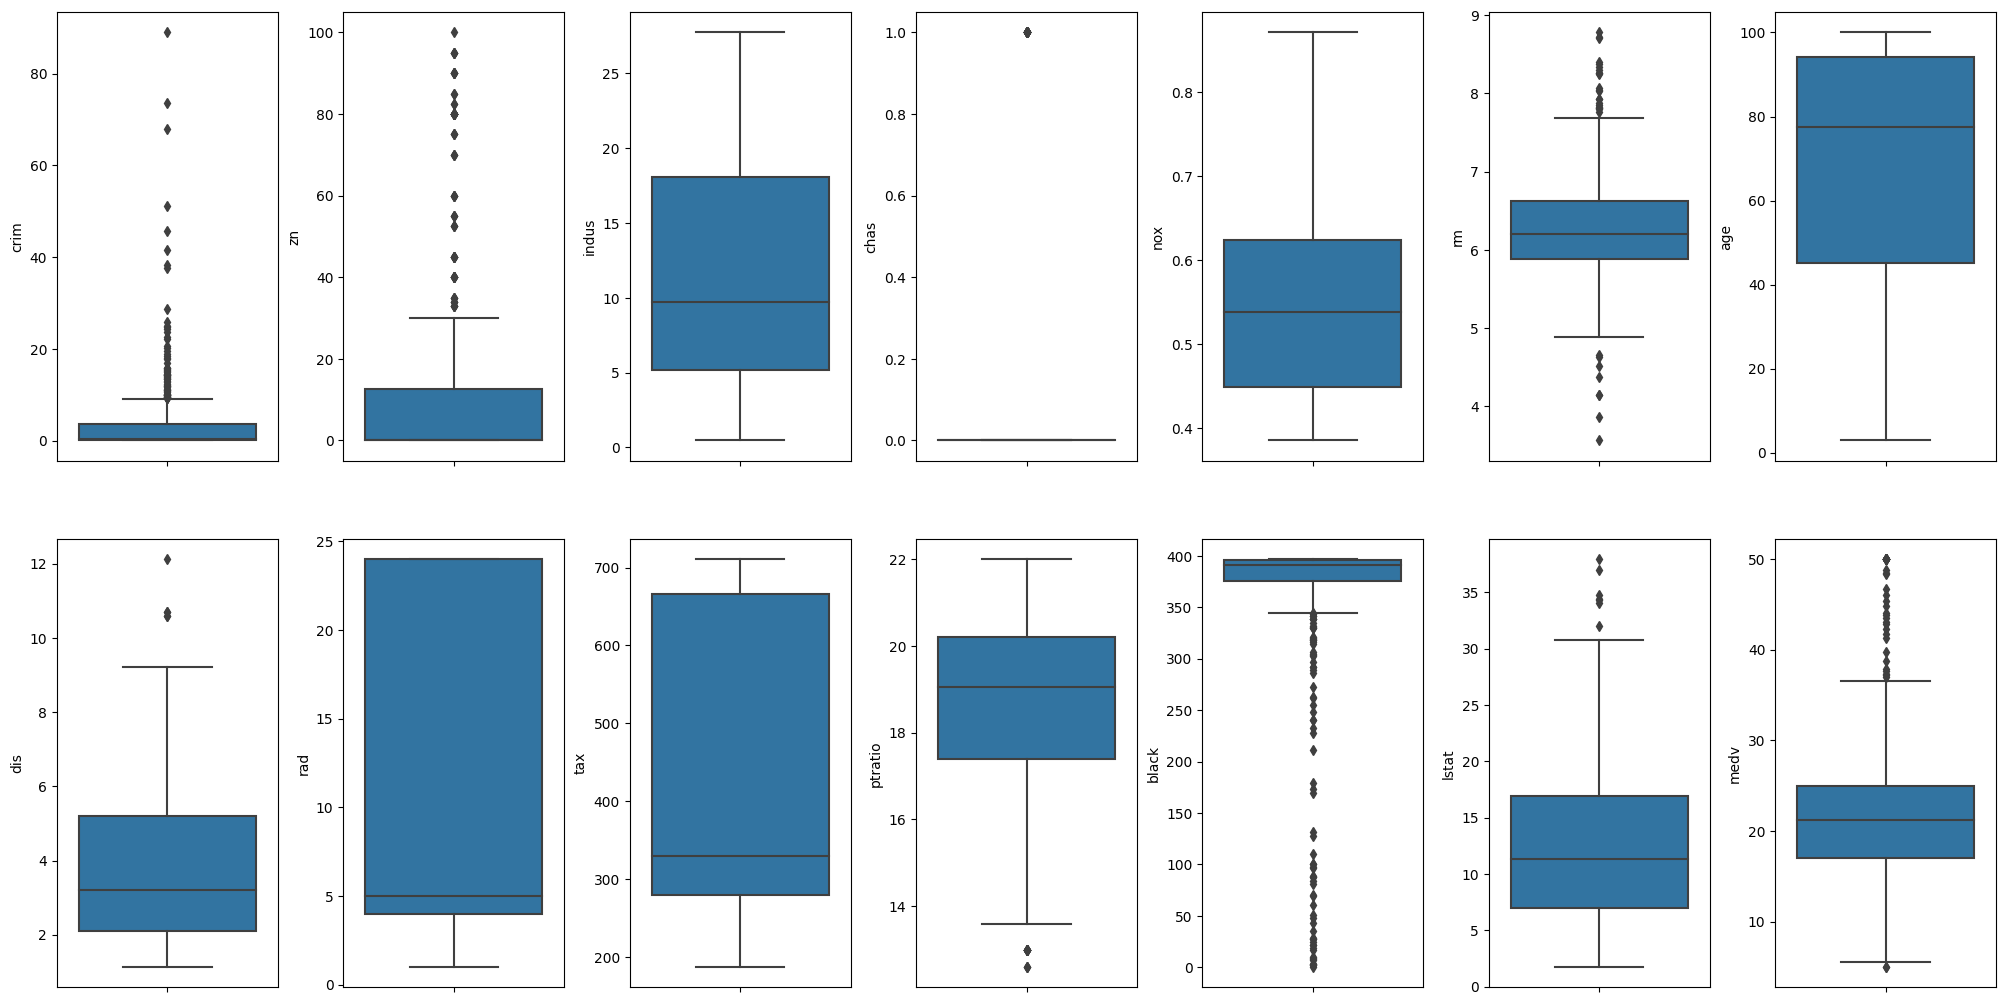

In [62]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in Boston.columns:
    sns.boxplot(y=Boston[col], ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

**Some columns has many outliers**  

**Let us make Distribution plot**

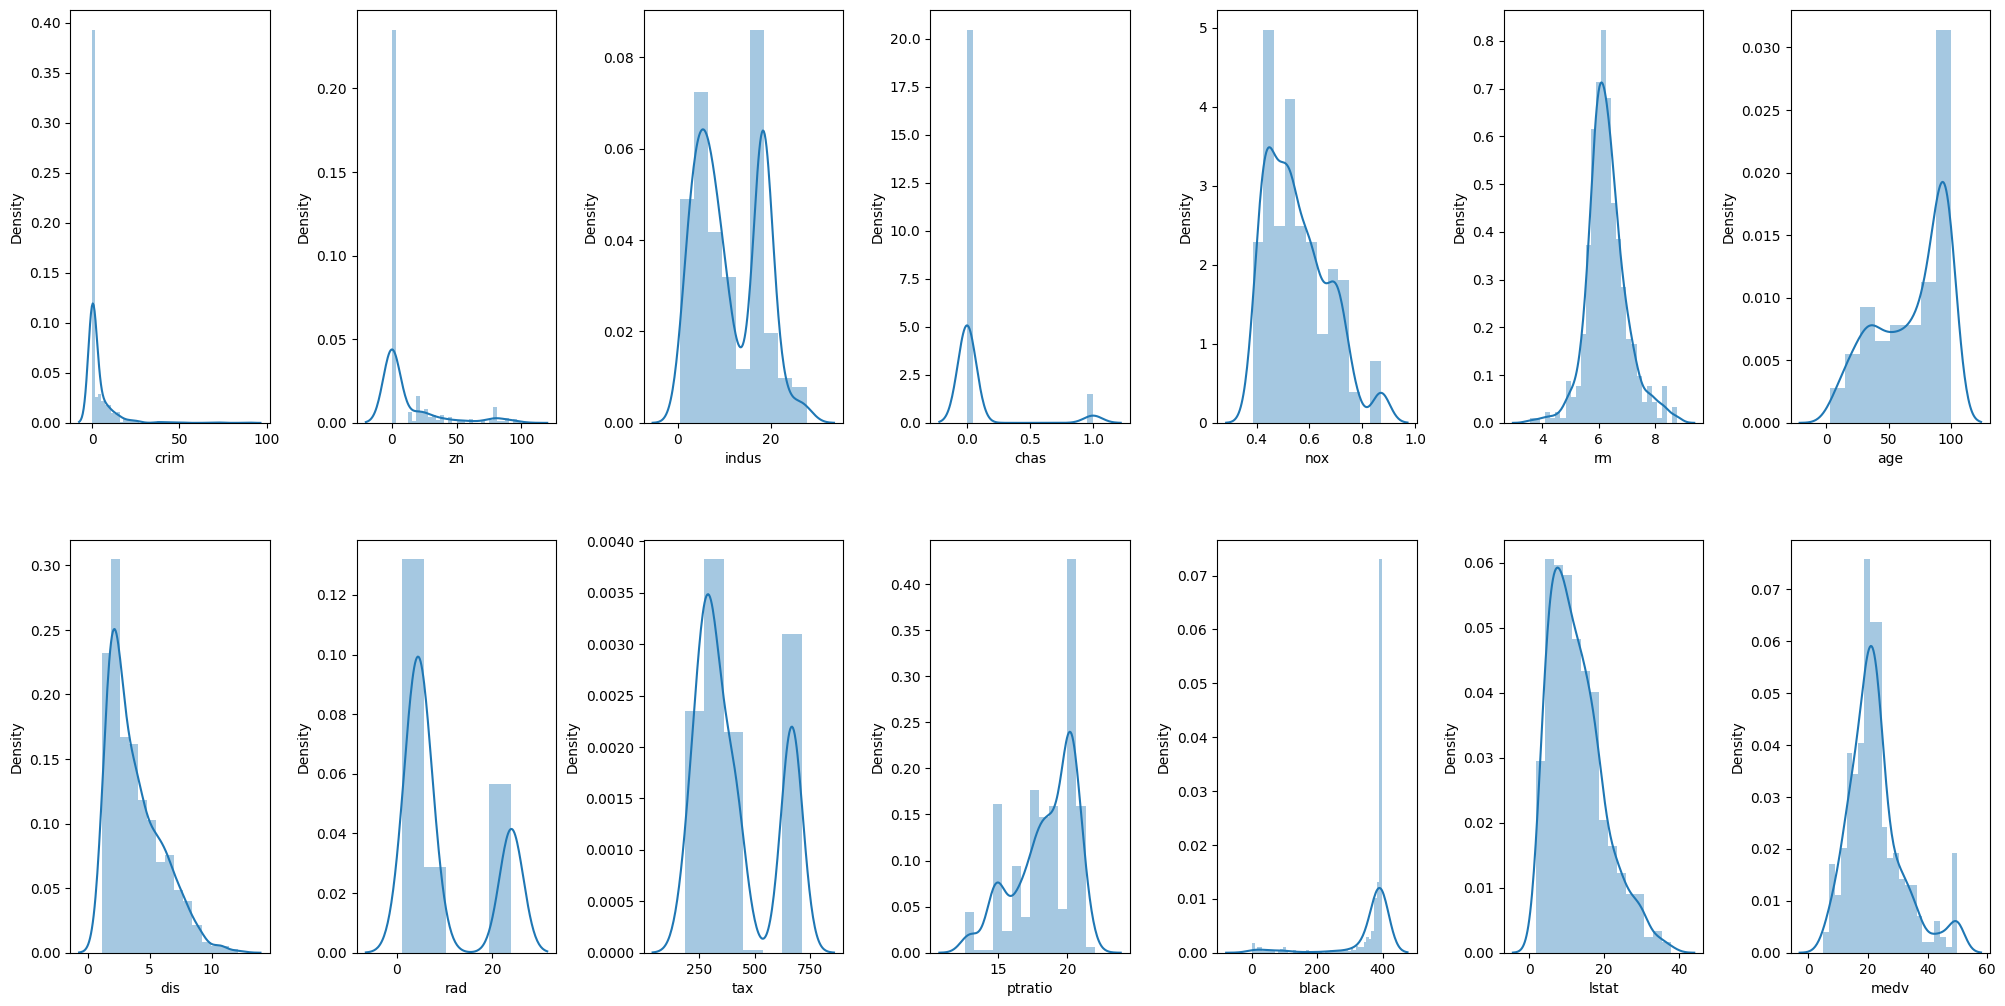

In [63]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in Boston.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# **Splitting Data**

In [64]:
X = Boston.drop(columns=['medv'], axis=1)
y = Boston['medv']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Printing the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (354, 13) (354,)
Test set shape: (152, 13) (152,)


#**Data Normalization**

**Rescaling or Feature Scaling(Min-Max Normalization)**

**For skewed columns**


In [66]:
skewed_columns=['crim','zn','dis','rad','tax','black']
for col in skewed_columns:
    # find minimum and maximum of that column
    minimum = min(X_train[col])
    maximum = max(X_train[col])
    X_train[col] = (X_train[col] - minimum) / (maximum - minimum)

**review after normalization**

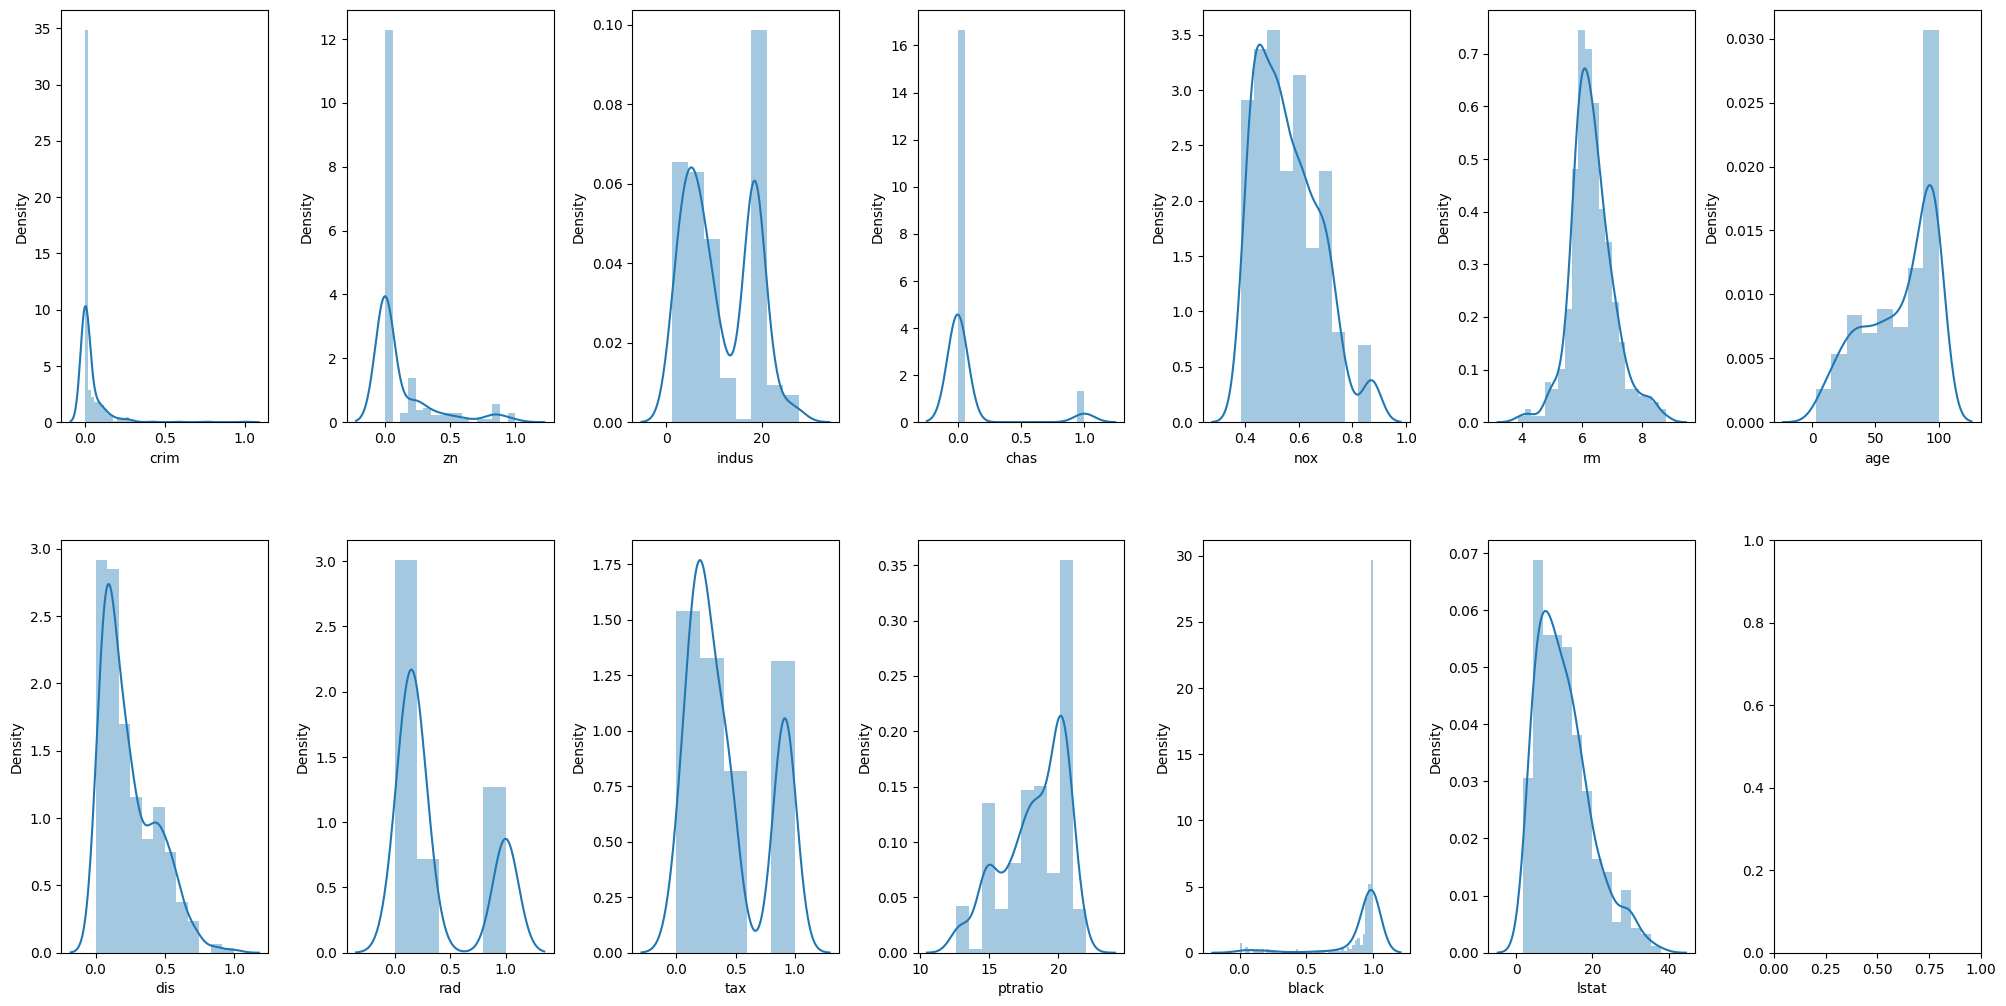

In [67]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in X_train.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**Data Describtion**

In [14]:
X_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#**Correlation**

In [80]:
X_train.shape

(354, 13)

In [81]:
boston_with_y = pd.concat([X_train, y_train], axis=1)
# correlation_matrix = boston_with_y.corr()
#correlation_with_y = correlation_matrix['y']

print(boston_with_y.shape)

(354, 14)


<Axes: >

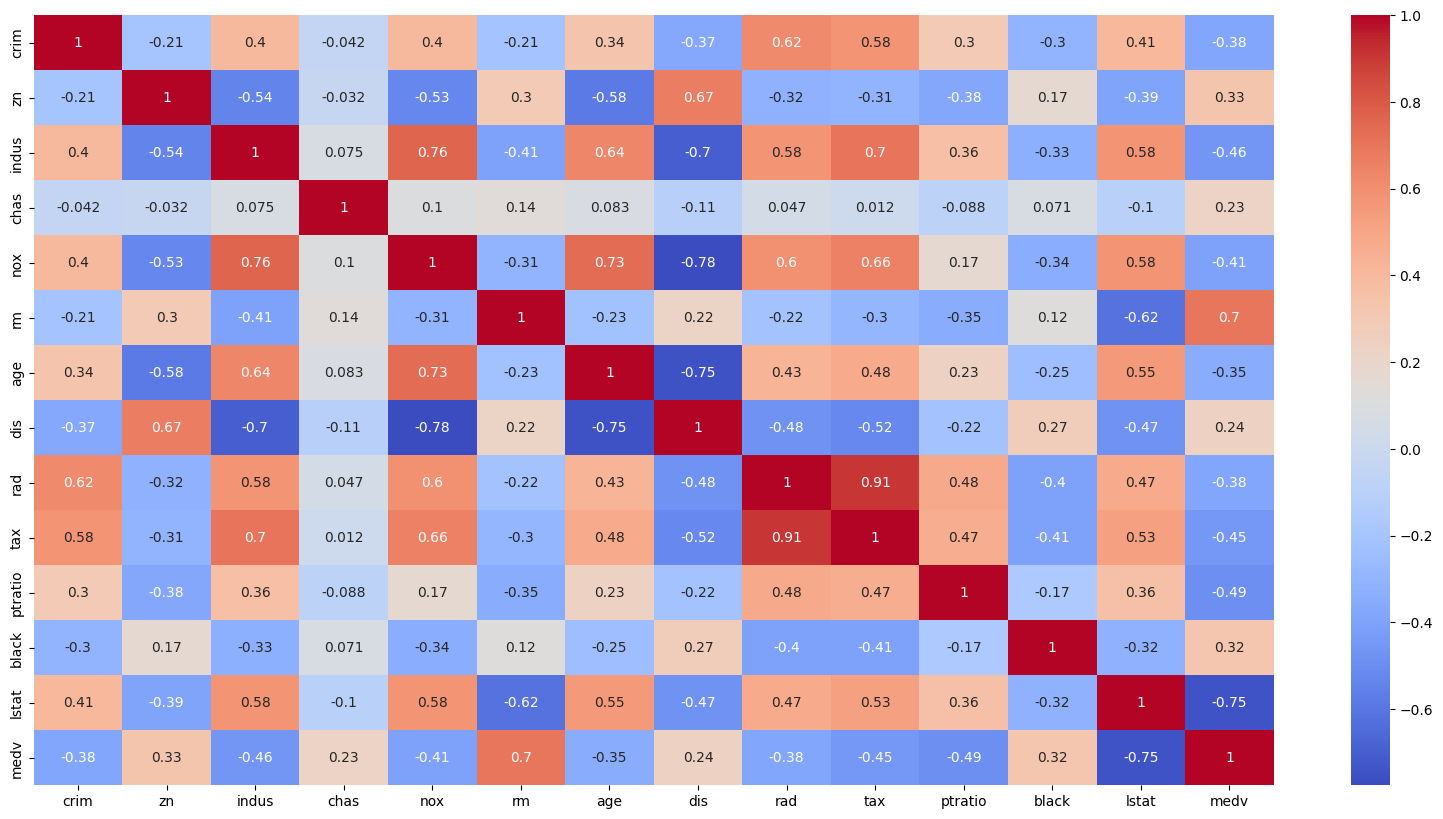

In [82]:
corr = boston_with_y.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Relation between Target(medv) and Correlated Variables**

**As we see rm ,istal, ptratio**

<Axes: xlabel='lstat', ylabel='medv'>

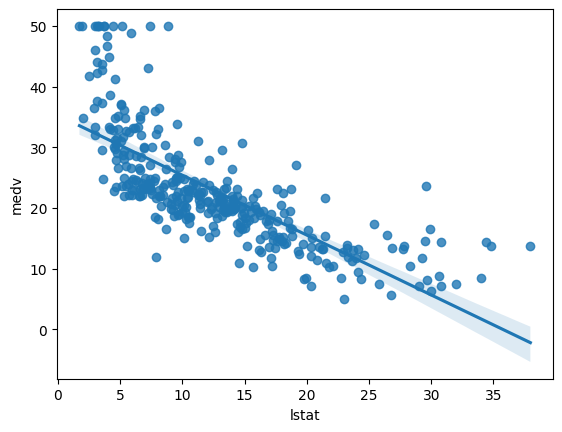

In [85]:
sns.regplot(y=y_train, x=X_train['lstat'])

<Axes: xlabel='rm', ylabel='medv'>

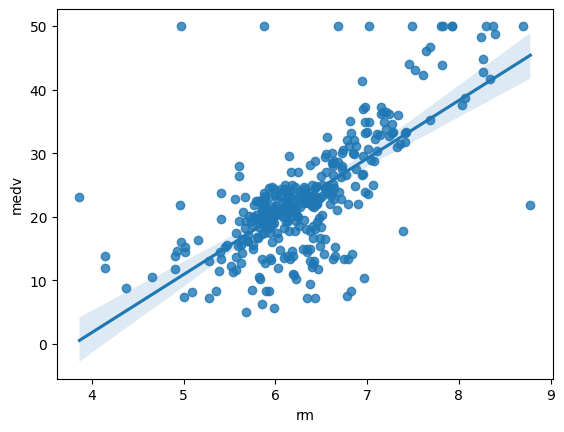

In [86]:
sns.regplot(y=y_train, x=X_train['rm'])

<Axes: xlabel='ptratio', ylabel='medv'>

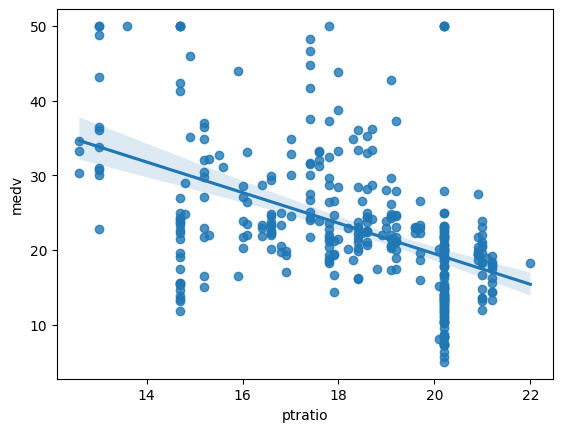

In [87]:
sns.regplot(y=y_train, x=X_train['ptratio'])

**So rm and istal are the most correlated variables with the target**

**droping unnecesary columns**

In [117]:
droped_columns = ['black', 'rad', 'dis', 'age', 'chas', 'zn']
X= X_train.drop(columns=droped_columns)

In [118]:
X.head()

,crim,indus,nox,rm,tax,ptratio,lstat
5,0.000234,2.18,0.458,6.430,0.066794,18.7,5.21
116,0.001377,10.01,0.547,6.176,0.467557,17.8,12.04
45,0.001825,6.91,0.448,5.682,0.087786,17.9,10.21
16,0.011744,8.14,0.538,5.935,0.229008,21.0,6.58
468,0.174971,18.10,0.580,5.926,0.914122,20.2,18.13


In [119]:
skewed_columns=['crim','zn','dis','rad','tax','black']
for col in skewed_columns:
    # find minimum and maximum of that column
    minimum = min(X_test[col])
    maximum = max(X_test[col])
    X_test[col] = (X_test[col] - minimum) / (maximum - minimum)

In [120]:
droped_columns = ['black', 'rad', 'dis', 'age', 'chas', 'zn']
X_t = X_test.drop(columns=droped_columns)

In [121]:
X_t.head()

,crim,indus,nox,rm,tax,ptratio,lstat
173,0.001162,4.05,0.510,6.416,0.206501,16.6,9.04
274,0.000682,6.41,0.447,6.758,0.126195,17.6,3.53
491,0.001352,27.74,0.609,5.983,1.000000,20.1,18.07
72,0.001160,10.81,0.413,6.065,0.223709,19.2,5.52
452,0.069142,18.10,0.713,6.297,0.913958,20.2,17.27


#**Trying some different models**

#**Create Grid Search**

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

def grid_search(estimator, id, param_grid):
    grid = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring={'mse': 'neg_mean_squared_error', 'accuracy': 'accuracy'},
        refit='accuracy',  # Use accuracy to select the best model
        cv=5
    )

    grid.fit(X, y_train)

    print(f"{id}  BEST ESTIMATOR: {grid.best_estimator_}")
    print(f"{id}  BEST PARAMETERS: {grid.best_params_}")
    print(f"{id}  BEST SCORE (MSE): {grid.best_score_}")

    # Prediction on test set
    y_pred = grid.predict(X_t)
    mse = metrics.mean_squared_error(y_test, y_pred)

    print(f"{id}  MSE: {mse}")


**Linear regression**

In [123]:
model1=LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
grid_search(model1, "Linear Regression", param_grid)

Linear Regression  BEST ESTIMATOR: LinearRegression(positive=True)
Linear Regression  BEST PARAMETERS: {'fit_intercept': True, 'positive': True}
Linear Regression  BEST SCORE (MSE): nan
Linear Regression  MSE: 40.35144969787306


**SVM**

In [135]:
model2 = svm.SVR()


param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' kernel
}
grid_search(model2, "SVM", param_grid)

SVM  BEST ESTIMATOR: SVR(C=0.1, kernel='linear')
SVM  BEST PARAMETERS: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM  BEST SCORE (MSE): nan
SVM  MSE: 27.202226104271954


**XGBoost**

In [128]:
model3 =XGBRegressor()

param_grid = {
"n_estimators": [200, 900],
"max_depth": [5, 10]
}

grid_search(model3, "XGBoost", param_grid)

XGBoost  BEST ESTIMATOR: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
XGBoost  BEST PARAMETERS: {'max_depth': 5, 'n_estimators': 200}
XGBoost  BEST SCORE (MSE): nan
XGBoost  MSE: 11.68968030939678


**Random Forest**

In [136]:
model4 = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search(model4, "Random Forest", param_grid)

Random Forest  BEST ESTIMATOR: RandomForestRegressor()
Random Forest  BEST PARAMETERS: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest  BEST SCORE (MSE): nan
Random Forest  MSE: 11.19427153289474


**Decision Tree**

In [138]:
model5= DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}
grid_search(model5, "Decision Tree Regressor", param_grid)

Decision Tree Regressor  BEST ESTIMATOR: DecisionTreeRegressor()
Decision Tree Regressor  BEST PARAMETERS: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Regressor  BEST SCORE (MSE): nan
Decision Tree Regressor  MSE: 18.53763157894737


#**Final Result and the best is:**

**XGBoost** Because it is the least MSE